# Car Price Prediction                                                                                                                                                                                        
The analysis has the following sections: 
1) Understanding the data
2) Cleaning the data
3) Preparing the data
4) Model building and evaluation

## 1) Undersatnding the data

Let us first import the libraries and go through the data

In [1]:
# Imporing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Here we plot the heatmap to get the correlation between the variables

[]

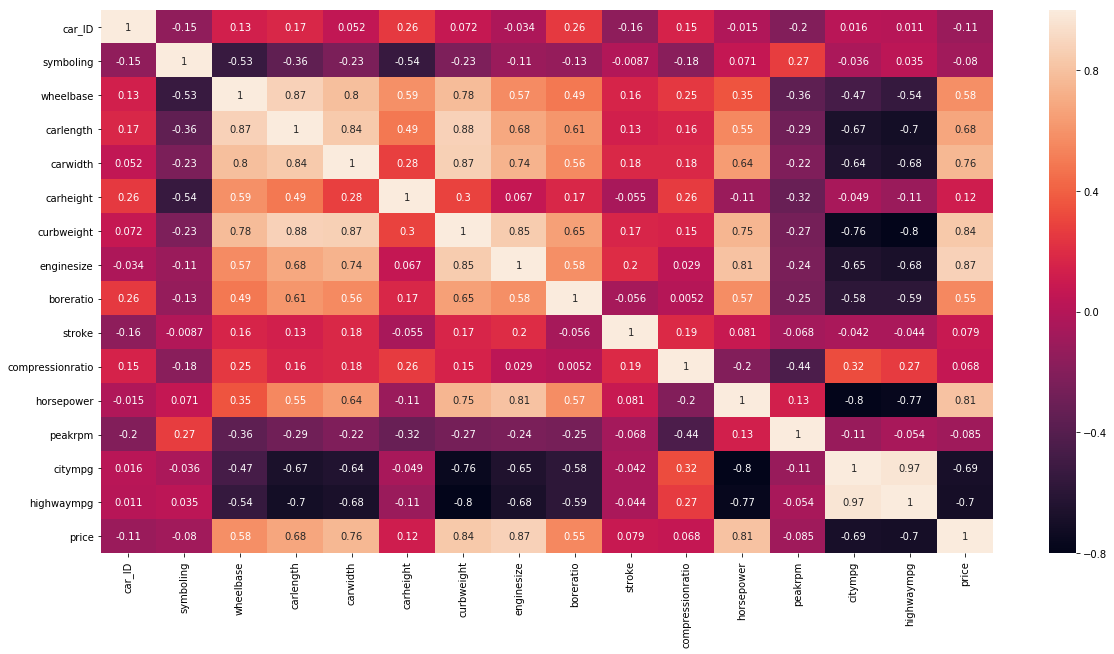

In [4]:
# Checking the correlation using heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.plot()

The heatmap shows some useful insights:

Price is highly positively correlated with wheelbase, carlength, carwidth, curbweight, enginesize etc.
Price is negatively correlated to citympg and highwaympg 

Many independent variables are highly correlated such as wheelbase, carlength, curbweight, enginesize etc. 

Thus, while building the model, we'll have to pay attention to multicollinearity

Let us plot the pairwise relation between the variables to check for linearity among the variables

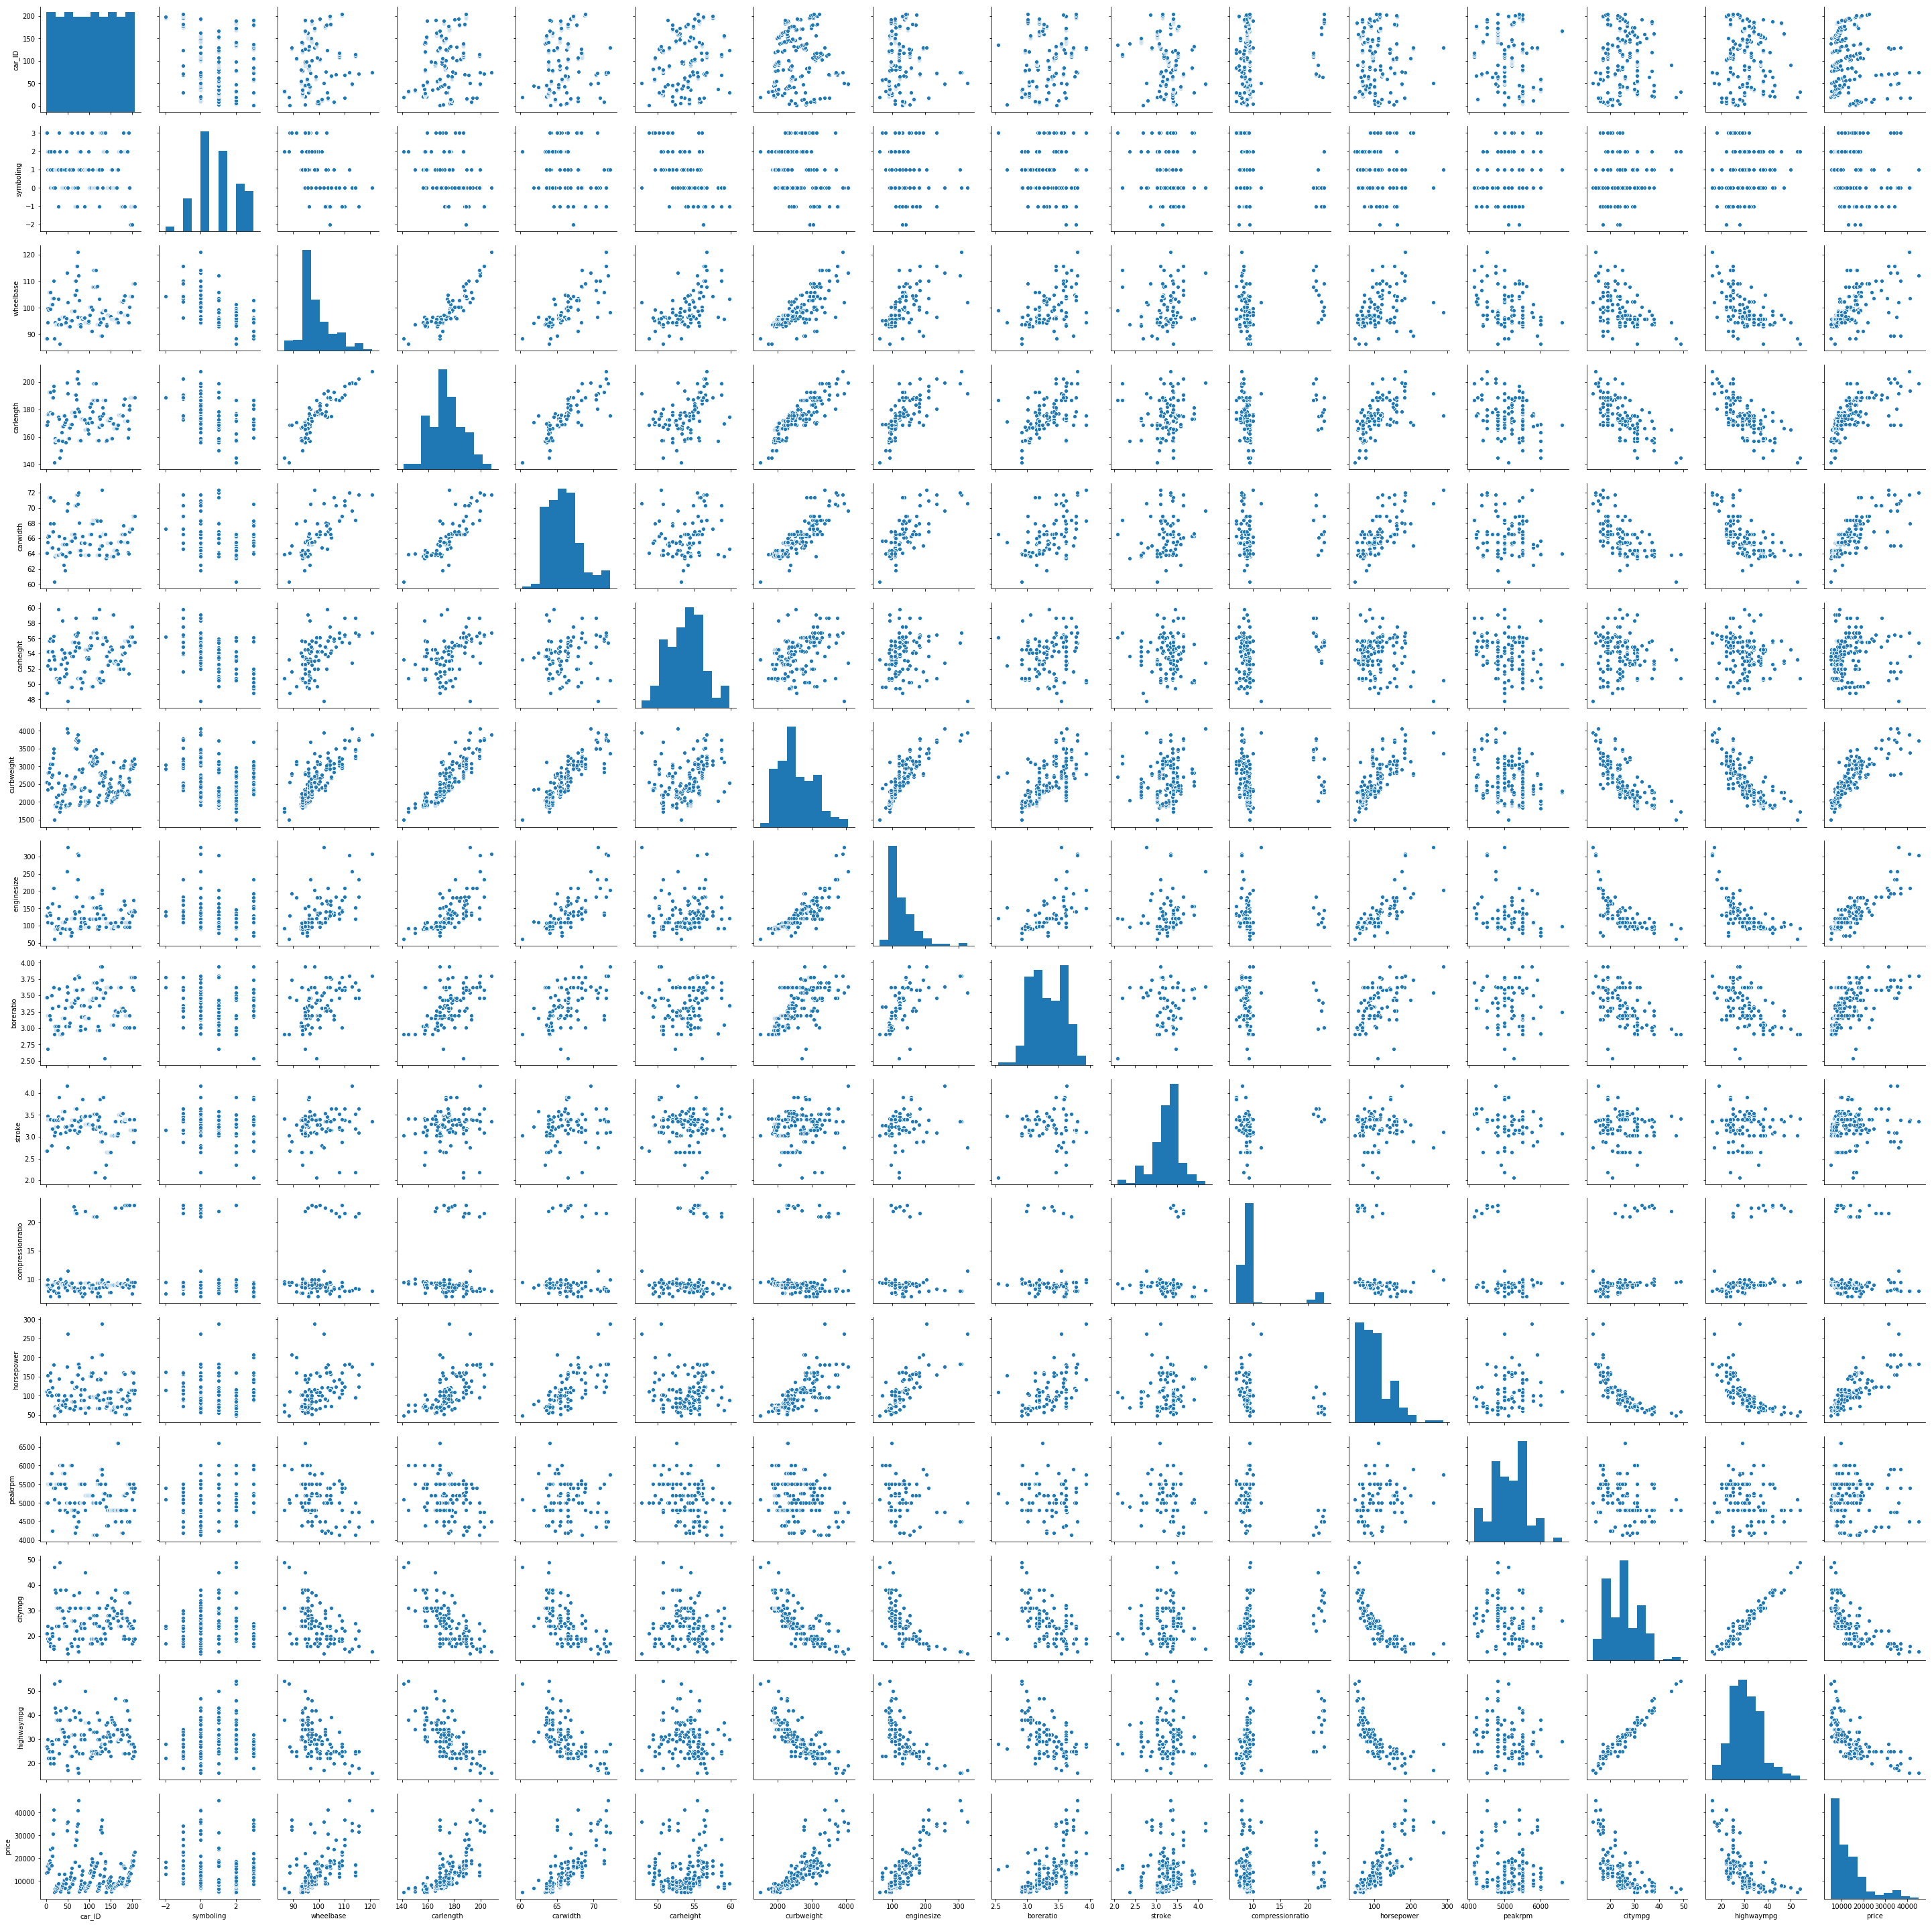

In [5]:
sns.pairplot(df)

## 2) Cleaning the data

The column 'Carname' contains both company name as well as the model name. Only the company name is of use for model building. So we split the column to get the company name

In [6]:
# Getting the carcompany names

df['CarCompany'] = df['CarName'].apply(lambda x : x.split(' ')[0])
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We can see the the there are many wrong named companies. maxda for mazda, toyouta for toyota etc. Let us replace them with the proper and a common name

In [7]:
df.CarCompany.replace(to_replace=dict(maxda='mazda', Nissan='nissan', porcshce='porsche', toyouta='toyota', vokswagen='volkswagen', vw='volkswagen'), inplace=True)
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Let us drop the carname and id column which are no longer needed

In [8]:
df = df.drop(['CarName', 'car_ID'], axis = 1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Let us now plot the barplots for each of the variable against price

C:\Users\vpgurura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


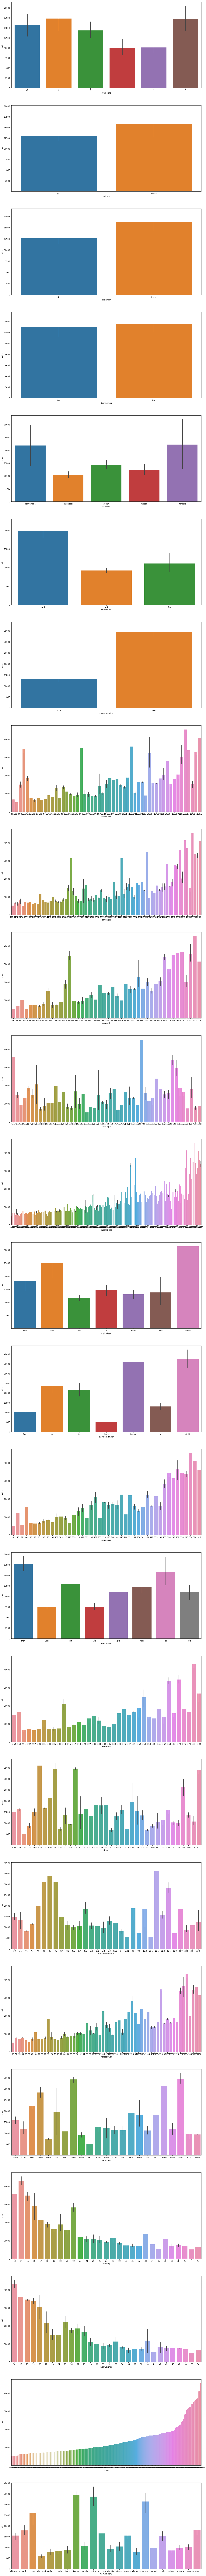

In [9]:
# Barplots for basic analysis

import math

current_plot_number = 1
total_plots = 30
plots_in_row = 1
for col in df.columns:
    plot_size=(18*plots_in_row,10*math.ceil(total_plots/plots_in_row))
    figure=plt.figure(1,plot_size)
    figure.add_subplot(math.ceil(total_plots/plots_in_row),plots_in_row,current_plot_number)
    sns.barplot(x=col, y='price', data=df)
    current_plot_number += 1

it can be clearly seen that the price highly depends on the enginelocation, the company, carwidth etc. Further analysis is needed to eliminate highly correlated variables

Let us now separate the columns into numeric and categorical and apply dummies for the categorical columns

## 3) Preparing the Data

In [10]:
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})
df['doornumber'] = df['doornumber'].map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})

In [11]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarCompany
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [13]:
#Obtaining the dummies for the categorical columns

dummies = pd.get_dummies(df_categorical, drop_first=True)
dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let us drop the categorical columns and append the dummies dataframe to the main dataframe

In [14]:
df = df.drop(list(df_categorical.columns), axis=1)
df = pd.concat([df, dummies], axis=1)
df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


Let us split the dataset into train and test set. Then we apply the Minmax scaling on the training set only for the numeric columns

## 4) Model Building and Evaluation

In [15]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns = df_numeric.columns

In [16]:
df_train[columns] = scaler.fit_transform(df_train[columns])
df_train.head()

C:\Users\vpgurura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vpgurura\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,0,0,0,0,0,0,0,0,0,0
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,0,0,0,0,0,0,0,0,0,1


In [17]:
# splitting y and x data

y_train = df_train.pop('price')
x_train = df_train

Here are some general funstions to generate rfe, build model and also obtain VIF. Also we use RFE to decide on the variables to consider for model building

In [21]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def rfe_fit(number_of_features):
    lm = LinearRegression()
    rfe = RFE(lm, number_of_features)
    rfe.fit(x_train, y_train)  
    return rfe

def get_X_train_rfe(rfe):
    col = x_train.columns[rfe.support_]
    X_train_rfe = x_train[col]
    return X_train_rfe
    
def build_stats_fit(X_train_rfe):        
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_rfe).fit()
    return lm, X_train_rfe

def vif(x_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = x_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

Let us first start with 15 variables and get the stats summary

In [22]:
rfe = rfe_fit(15)
print(rfe.support_, rfe.ranking_)

[False False False  True  True False  True  True  True  True  True  True
 False  True False False  True False False False False False False False
  True False  True False False False False False False False False False
 False False False  True False False False False False False False False
 False False  True False  True False False False False False False] [38 36  4  1  1 18  1  1  1  1  1  1 13  1  6 26  1 15 10  7  9  8 35 37
  1 14  1 21 12 42  3 33 17  2 44 40 39 43 28  1 34 22 19 23 30 24 32 45
 16 29  1 20  1 25  5 11 31 27 41]


In [23]:
X_train_rfe = get_X_train_rfe(rfe)
model1, x_train_rfe = build_stats_fit(X_train_rfe)
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.1
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           2.29e-68
Time:                        14:39:21   Log-Likelihood:                 214.16
No. Observations:                 143   AIC:                            -396.3
Df Residuals:                     127   BIC:                            -348.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2080    

In [24]:
_vif = vif(X_train_rfe)
_vif

,Features,VIF
4,enginesize,109.65
9,fueltype_gas,86.76
3,cylindernumber,86.45
2,curbweight,62.94
0,carlength,58.03
1,carwidth,49.71
5,boreratio,41.34
6,stroke,31.90
7,compressionratio,12.99
13,CarCompany_peugeot,10.70


We see that the model is performing well on stats with an adj R-sq of .93 and very low p-values. However there are variables with infinite VIF which are of no use. So lets drop to 10 variables

In [505]:
rfe = rfe_fit(10)
print(rfe.support_, rfe.ranking_)

[False False False  True False  True  True  True False False False False
 False False False False False False False False False False False  True
 False False False False False  True False False False  True  True False
 False False False False False False False False  True False False False
 False False False False False False False False False  True False False
 False False False False] [49 17 21  1 18  1  1  1  2 25 15 16 37 26 29 14 43 31 30 32 33 54 41  1
 12  7 45 10 39  1  5  4 28  1  1  3 34 40 24 46 48 44 47 35  1 36 23 20
 22 42 27 50 55 13 52  6 19  1 38  9 11 53 51  8]


In [506]:
X_train_rfe = get_X_train_rfe(rfe)
model1, x_train_rfe = build_stats_fit(X_train_rfe)
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           1.21e-64
Time:                        16:37:54   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [507]:
_vif = vif(X_train_rfe)
_vif

,Features,VIF
1,curbweight,41.06
0,carwidth,25.19
2,enginesize,24.95
3,boreratio,9.78
9,CarCompany_porsche,1.67
4,enginelocation_rear,1.61
7,cylindernumber_twelve,1.50
5,enginetype_rotor,1.27
8,CarCompany_bmw,1.18
6,cylindernumber_three,1.01


After reducing to 10 variables we see that the adj. R-sq has reduced from .93 to .906 which is still good. But the p-value for cylindernumber_twelve has increased to .511. Also, the VIF for crbweight, carwidth etc are still very high. Lets eliminate cylindernumber_twelve and check

In [508]:
X_train_rfe.drop('cylindernumber_twelve', axis = 1, inplace = True)
model2, x_train_rfe = build_stats_fit(X_train_rfe)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           1.18e-65
Time:                        16:37:56   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

C:\Users\vpgurura\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [509]:
_vif = vif(X_train_rfe)
_vif

,Features,VIF
1,curbweight,38.41
0,carwidth,24.99
2,enginesize,17.70
3,boreratio,9.70
8,CarCompany_porsche,1.66
4,enginelocation_rear,1.60
5,enginetype_rotor,1.21
7,CarCompany_bmw,1.14
6,cylindernumber_three,1.01


In [510]:
X_train_rfe.drop('curbweight', axis = 1, inplace = True)
model2, x_train_rfe = build_stats_fit(X_train_rfe)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           2.01e-63
Time:                        16:37:59   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [511]:
_vif = vif(X_train_rfe)
_vif

,Features,VIF
0,carwidth,16.48
1,enginesize,10.03
2,boreratio,9.35
3,enginelocation_rear,1.60
7,CarCompany_porsche,1.59
4,enginetype_rotor,1.17
6,CarCompany_bmw,1.14
5,cylindernumber_three,1.01


After removing cylindernumber_twelve and curbweight, the adj. R-sq has dropped to .895 which is not much of change and shows there was no much effect of the variable. Let us remove the carwidth variable now as the VIF is very high

In [512]:
X_train_rfe.drop('carwidth', axis = 1, inplace = True)
model2, x_train_rfe = build_stats_fit(X_train_rfe)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           4.68e-51
Time:                        16:38:01   Log-Likelihood:                 149.21
No. Observations:                 143   AIC:                            -282.4
Df Residuals:                     135   BIC:                            -258.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0912 

In [513]:
_vif = vif(X_train_rfe)
_vif

,Features,VIF
1,boreratio,5.49
0,enginesize,5.47
6,CarCompany_porsche,1.59
2,enginelocation_rear,1.51
3,enginetype_rotor,1.10
5,CarCompany_bmw,1.10
4,cylindernumber_three,1.00


After removing carwidth the adj. R-sq has dropped to .835 which is still very good and also the VIF of all the variables has also reduced to below 5. But there are few variables with high p-values. Lets remove them one by one

In [514]:
X_train_rfe.drop('boreratio', axis = 1, inplace = True)
model2, x_train_rfe = build_stats_fit(X_train_rfe)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           4.57e-52
Time:                        16:38:04   Log-Likelihood:                 149.08
No. Observations:                 143   AIC:                            -284.2
Df Residuals:                     136   BIC:                            -263.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0843 

In [515]:
_vif = vif(X_train_rfe)
_vif

,Features,VIF
5,CarCompany_porsche,1.56
1,enginelocation_rear,1.50
0,enginesize,1.16
4,CarCompany_bmw,1.10
2,enginetype_rotor,1.00
3,cylindernumber_three,1.00


In [516]:
X_train_rfe.drop('cylindernumber_three', axis = 1, inplace = True)
model2, x_train_rfe = build_stats_fit(X_train_rfe)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           5.68e-53
Time:                        16:38:06   Log-Likelihood:                 148.60
No. Observations:                 143   AIC:                            -285.2
Df Residuals:                     137   BIC:                            -267.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0820    

In [517]:
_vif = vif(X_train_rfe)
_vif

,Features,VIF
4,CarCompany_porsche,1.56
1,enginelocation_rear,1.50
0,enginesize,1.16
3,CarCompany_bmw,1.10
2,enginetype_rotor,1.00


In [518]:
X_train_rfe.drop('enginelocation_rear', axis = 1, inplace = True)
model2, x_train_rfe = build_stats_fit(X_train_rfe)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     180.8
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           7.97e-54
Time:                        16:38:09   Log-Likelihood:                 147.87
No. Observations:                 143   AIC:                            -285.7
Df Residuals:                     138   BIC:                            -270.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0825      0

In [519]:
_vif = vif(X_train_rfe)
_vif

,Features,VIF
0,enginesize,1.16
2,CarCompany_bmw,1.10
3,CarCompany_porsche,1.06
1,enginetype_rotor,1.00


Thus after removing the 3 variables we see that the adj. R-sq is still .835. Thus the variables were of not any use. Now all the remaining variables has good p-values and also VIF. Thus we can go ahead to build the model

###### Thus the final variables are enginesize, enginetype_rotor, CarCompany_bmw, CarCompany_porsche and the adjusted R-squared is 0.835

Let us now check for the error terms in the final model. We can see that the eroor terms follow a normal pattern centered around 0. So the model has a very good prediction 

### Residual Analysis

C:\Users\vpgurura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

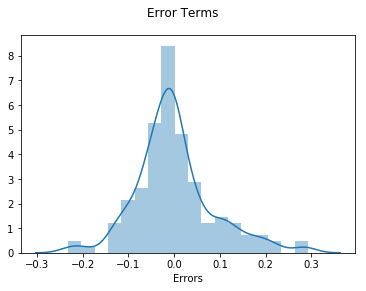

In [520]:
y_train_price = model2.predict(x_train_rfe)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price))
fig.suptitle('Error Terms')                  # Plot heading 
plt.xlabel('Errors')

In [521]:
X_train_rfe.columns

Index(['enginesize', 'enginetype_rotor', 'CarCompany_bmw',
       'CarCompany_porsche'],
      dtype='object')

Now let us try to use the model on the test set. We first scale the test set using MinMax scaler and predict the price using the accepted variables

### Predictions

In [522]:
df_test[columns] = scaler.transform(df_test[columns])

C:\Users\vpgurura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vpgurura\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [523]:
y_test = df_test.pop('price')
x_test = df_test

In [524]:
X_test_rfe = x_test[['enginesize', 'enginetype_rotor', 'CarCompany_bmw', 'CarCompany_porsche']]
X_test_rfe = sm.add_constant(X_test_rfe)

Text(0, 0.5, 'y_pred')

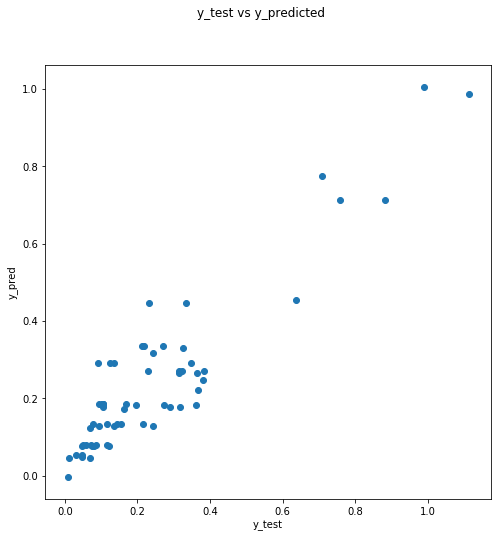

In [525]:
y_predicted = model2.predict(X_test_rfe)
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_predicted)
fig.suptitle('y_test vs y_predicted') 
plt.xlabel('y_test')
plt.ylabel('y_pred')

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [526]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.8494974184171015

Thus the R-square values for the train and test set are very good and so it can be said that the model is very good for prediction. Let us check for the correlation between the variables

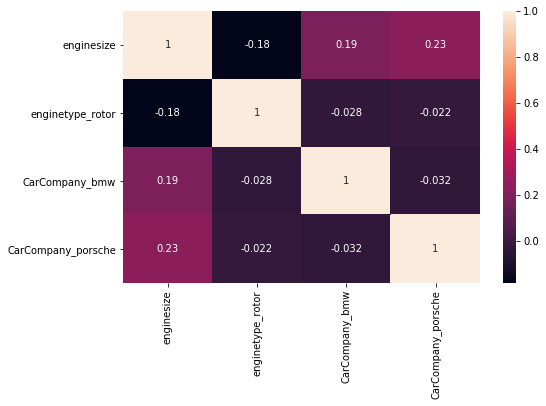

In [527]:
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(df[['enginesize', 'enginetype_rotor', 'CarCompany_bmw', 'CarCompany_porsche']].corr(), annot=True)
plt.show()

The correlation is also pretty good and so the model is doing a good job

The final equation can be given as:

##### price = 1.1674 * enginesize + 0.25 * enginetype_rotor + 0.2049 * CarCompany_bmw + 0.2104 * CarCompany_porsche - 0.0825

###### Also, as per previous trial, enginelocation can also be used as a 5th variable for prediction